### Remember Fashion Mnist dataset?

In [1]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
dataset = datasets.MNIST(root='/root/data', train=True, download=True, transform=transform)

# Create DataLoader with multiple workers
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.10MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


🤔❓ How did we decide that mean and standard deviation will be 0.5 and 0.5?

Let's calculate the dataset mean and std to have a new normalized dataset with a mean of zero and standard deviation of 1

In [25]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transformation and remove the .normalize transform

transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load dataset
dataset = datasets.MNIST(root='/root/data', train=True, download=True, transform=transform)

# Create DataLoader with multiple workers
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [26]:
import torch
def mean_std(dataloader):
    #finding mean and std for input images

    summ_means, squared_sum_mean, num_batches= 0, 0, 0
    num_batches = len(dataloader)

    for data,label in dataloader:
        # Mean over batch, height and width, but not over the channels
        summ_means += torch.mean(data) #sum of means for all batches
        squared_sum_mean += torch.mean(data**2) #sum of mean of squares for all batches

    mean_gray = summ_means / len(dataloader) #num_batches = len(dataloader)

    # std = sqrt(E[X^2] - (E[X])^2)
    std_gray = (squared_sum_mean / num_batches - mean_gray ** 2) ** 0.5
    print("Mean is ",mean_gray.item()," STD is ",std_gray.item())
    return mean_gray,std_gray


mean_std(dataloader)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Mean is  0.1306595653295517  STD is  0.30810678005218506


(tensor(0.1307), tensor(0.3081))

In [27]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load dataset
train_dataset = datasets.FashionMNIST(root='/root/data', train=True, download=True, transform=transform)

# Create DataLoader with multiple workers
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
#len(train_dataloader.dataset)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [28]:
test_dataset = datasets.FashionMNIST(root='/root/data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [29]:
len(train_dataset)

60000

In [30]:
len(test_dataset)

10000

### What is a validation dataset? How do we obtain a validation dataset for Fashion Mnist?

Hint: Use random_split method

In [8]:
### What is the size of the training and testing datasets?
print(len(train_dataloader.dataset))
print(len(test_loader.dataset))

60000
10000


In [31]:
# split the training dataset into training and validation datasets
train_dataset,valid_dataset = torch.utils.data.random_split(train_dataset,[50000,10000])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=True)

print(f"Training dataset size: {len(train_dataloader.dataset)}")
print(f"Validation dataset size: {len(valid_loader.dataset)}")

Training dataset size: 50000
Validation dataset size: 10000


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### 🤔❓Do you remember the old training loop?
### Let's recap From last session

#### 1. Training NNs

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init


# Define your neural network architecture
class NeuralNet(nn.Module): #inheretence concept
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU() #whether you will use this many times or not , Define it once
        self.fc1 = nn.Linear(784, 256) # Common approach 2^n

        init.uniform_(self.fc1.weight,a=0.1, b=1.1)
        init.zeros_(self.fc1.bias)

        self.fc2 = nn.Linear(256, 10) #why 10 ?
        init.xavier_uniform_(self.fc2.weight, gain=1.1)



    def forward(self, x):
        x = self.flatten(x) # 28x28 --> 784
        x = self.fc1(x)   # 784 --> 256
        x = self.relu(x)
        x = self.fc2(x) # 256-->10 #Is dependent on the loss you will use
        #x = torch.softmax(x, dim=1)
        return x


# Instantiate the neural network
model = NeuralNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Classification or regression?
optimizer = optim.SGD(model.parameters(), lr=0.01)



In [47]:
print(model.fc2.weight)

Parameter containing:
tensor([[-0.0839,  0.1179, -0.0404,  ..., -0.0862, -0.1351, -0.0470],
        [-0.0065, -0.1045, -0.0907,  ..., -0.0697,  0.0778, -0.1648],
        [-0.0412, -0.0474,  0.0884,  ..., -0.1538,  0.0573, -0.1151],
        ...,
        [ 0.0640,  0.1267, -0.1010,  ...,  0.0391, -0.0889, -0.0923],
        [-0.1375,  0.0940, -0.0640,  ...,  0.0684, -0.0712,  0.1580],
        [-0.0296,  0.0239,  0.0400,  ..., -0.1265,  0.0825, -0.1595]],
       requires_grad=True)


#### 2. Create a training Loop

In [ ]:
# Train the neural network
Epochs = 10
for epoch in range(Epochs): # 10  Epochs
    # ToDo: put the model in the training mode
    #✍️✍️✍️
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader: #looping the batches


        # Zero the gradients
        optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward() #calculate the gradients
        #update our weights of each Batch
        optimizer.step()

        running_loss += loss.item() #accumulating losses over batches

    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_dataloader)}") # Batch loss=Total losses/number of batches

    #ToDo: Print accuracies alongside losses. Hint: Use torch.max
    #✍️✍️✍️


Epoch 1: Loss = 0.7870230731615888
Epoch 2: Loss = 0.5187755208343331
Epoch 3: Loss = 0.46934768727529785
Epoch 4: Loss = 0.4415076993612338
Epoch 5: Loss = 0.4218966888942952
Epoch 6: Loss = 0.40662452397443083
Epoch 7: Loss = 0.39376352547900256
Epoch 8: Loss = 0.3834213175054298
Epoch 9: Loss = 0.37389667356001544
Epoch 10: Loss = 0.3654191573895117


### Let's create another training loop:

Use the new `train_loader` and `valid_loader`

In [32]:
# Train the neural network
Epochs = 10
training_losses = []
validation_losses = []


for epoch in range(Epochs): # 10  Epochs
    # ToDo: put the model in the training mode
    #✍️✍️✍️
    model.train()
    running_loss = 0.0
    valid_loss = 0.0
    for inputs, labels in train_dataloader: #looping the batches


        # Zero the gradients
        optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward() #calculate the gradients
        #update our weights of each Batch
        optimizer.step()

        running_loss += loss.item() #accumulating losses over batches

    total_loss = running_loss/len(train_dataloader)
    training_losses.append(total_loss)
    print(f"Epoch {epoch+1}: Loss = {total_loss}") # Batch loss=Total losses/number of batches

    model.eval()
    for inputs, labels in valid_loader: #looping the batches


        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        valid_loss += loss.item() #accumulating losses over batches

    total_loss = valid_loss/len(valid_loader)
    validation_losses.append(total_loss)
    print(f"Epoch {epoch+1}: Loss = {total_loss}") # Batch loss=Total losses/number of batches

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1: Loss = 0.5969221444081163
Epoch 1: Loss = 0.5002588707550316


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 2: Loss = 0.4434153746880229
Epoch 2: Loss = 0.49950206792278656


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 3: Loss = 0.4055026730956019
Epoch 3: Loss = 0.41825512545123983


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 4: Loss = 0.3823337801886946
Epoch 4: Loss = 0.40947452481764895


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 5: Loss = 0.365036198740725
Epoch 5: Loss = 0.4038803956121396


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 6: Loss = 0.351627932161169
Epoch 6: Loss = 0.4023669956216387


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 7: Loss = 0.34107910010896986
Epoch 7: Loss = 0.3653202087256559


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 8: Loss = 0.32894285773034293
Epoch 8: Loss = 0.36173116097784347


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 9: Loss = 0.3206980567034858
Epoch 9: Loss = 0.36849034136267983


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 10: Loss = 0.3121080047753461
Epoch 10: Loss = 0.3648009179693878


In [34]:
print(f"training losses {training_losses}")
print(f"validation losses {validation_losses}")

training losses [0.5969221444081163, 0.4434153746880229, 0.4055026730956019, 0.3823337801886946, 0.365036198740725, 0.351627932161169, 0.34107910010896986, 0.32894285773034293, 0.3206980567034858, 0.3121080047753461]
validation losses [0.5002588707550316, 0.49950206792278656, 0.41825512545123983, 0.40947452481764895, 0.4038803956121396, 0.4023669956216387, 0.3653202087256559, 0.36173116097784347, 0.36849034136267983, 0.3648009179693878]


### ✍️ ToDO: Save training and validation losses in lists and use them to plot a line plot of losses (training and validation) during training. Explain what is done

Feel free to use Gemini

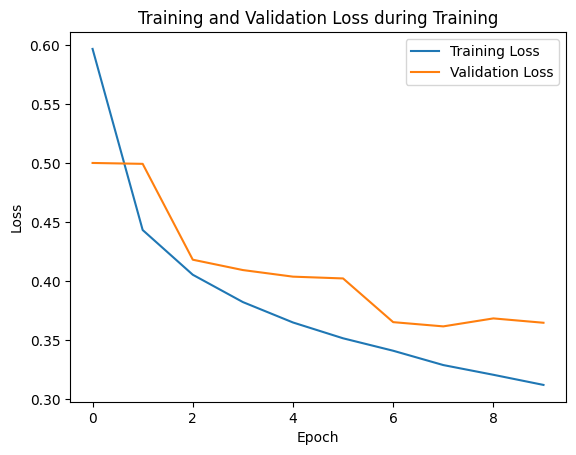

In [35]:
import matplotlib.pyplot as plt

plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss during Training')
plt.legend()
plt.show()

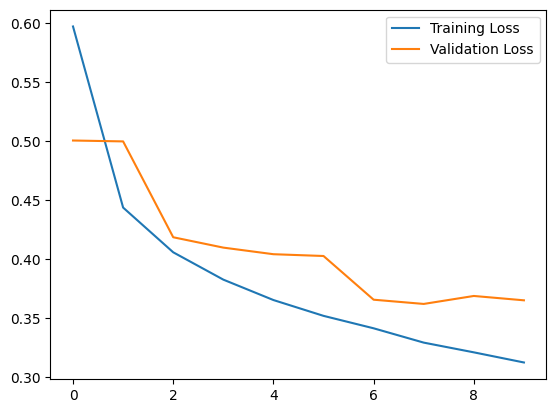

In [36]:
# Plot the training and validation loss history
plt.plot(training_losses, label="Training Loss")
plt.plot(validation_losses, label="Validation Loss")
plt.legend()
plt.show()

### ✍️ ToDO: Save the model with the lowest validation loss and explain your code

Feel free to use Gemini

In [37]:
# Train the neural network
Epochs = 10
training_losses = []
validation_losses = []
best_val_loss = float('inf') #A very big number approaching infinity


for epoch in range(Epochs): # 10  Epochs
    # ToDo: put the model in the training mode
    #✍️✍️✍️
    model.train()
    running_loss = 0.0
    valid_loss = 0.0
    for inputs, labels in train_dataloader: #looping the batches


        # Zero the gradients
        optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward() #calculate the gradients
        #update our weights of each Batch
        optimizer.step()

        running_loss += loss.item() #accumulating losses over batches

    total_loss = running_loss/len(train_dataloader)
    training_losses.append(total_loss)
    print(f"Epoch {epoch+1}: Loss = {total_loss}") # Batch loss=Total losses/number of batches

    model.eval()
    for inputs, labels in valid_loader: #looping the batches


        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        valid_loss += loss.item() #accumulating losses over batches

    total_loss = valid_loss/len(valid_loader)
    validation_losses.append(total_loss)
    print(f"Epoch {epoch+1}: Loss = {total_loss}") # Batch loss=Total losses/number of batches
    if total_loss < best_val_loss:
      best_val_loss = total_loss
      best_state_dict = model.state_dict()

torch.save(best_state_dict, 'best_model.pth') # GJ Asmaa :D

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1: Loss = 0.30470900154670183
Epoch 1: Loss = 0.3603500742821177


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 2: Loss = 0.2984904397917373
Epoch 2: Loss = 0.3387042514647648


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 3: Loss = 0.2902717725338076
Epoch 3: Loss = 0.33151998280719586


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 4: Loss = 0.28472789489399747
Epoch 4: Loss = 0.3591884320518773


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 5: Loss = 0.2804859746199892
Epoch 5: Loss = 0.3868009879425832


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 6: Loss = 0.2739608609939323
Epoch 6: Loss = 0.3217357052549435


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 7: Loss = 0.2691384363833748
Epoch 7: Loss = 0.32724509345498054


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 8: Loss = 0.2639665638032319
Epoch 8: Loss = 0.3300118577328457


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 9: Loss = 0.2596530142857138
Epoch 9: Loss = 0.3155978689812551


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 10: Loss = 0.25516135375136917
Epoch 10: Loss = 0.3377969369387171


### ✍️ToDO: Ask Gemini,
For the previously created network what was the initialization technique used ? what is the default technique?


Uniform distribution for weights of the linear layer and zero bias.

### Dislay some layers weghts and biases values

In [19]:
# Print the initialized weights
print("fc1 weight:", model.fc1.weight)
## To Do : Print the mean and standard deviation of FC1 weights
print(f"fc1 weight Mean: {torch.mean(model.fc1.weight)}, STD: {torch.std(model.fc1.weight)}")
## To Do : Print the maximum and minimum values of FC1 weights
print(f"fc1 weight Max: {torch.max(model.fc1.weight)}, Min: {torch.min(model.fc1.weight)}" )

#[256, 784].[784,1] =  [256,1]
print("fc1 bias:", model.fc1.bias)
## To Do : Print the maximum and minimum values of FC1 biases
print(f" fc1 bias max and min is: {torch.max(model.fc1.bias)} and {torch.max(model.fc1.bias)}.")
## To Do : Print the mean and standard deviation of FC1 biases
print(f" fci mean max and std is: {torch.mean(model.fc1.bias)} and {torch.std(model.fc1.bias)}.")



fc1 weight: Parameter containing:
tensor([[ 0.0059,  0.0239,  0.0082,  ...,  0.0083,  0.0236,  0.0210],
        [ 0.0106,  0.0036,  0.0231,  ...,  0.0258, -0.0327, -0.0302],
        [-0.0233,  0.0219,  0.0034,  ..., -0.0128, -0.0086, -0.0233],
        ...,
        [ 0.0238,  0.0283, -0.0252,  ...,  0.0083,  0.0234, -0.0191],
        [-0.0085, -0.0389,  0.0028,  ..., -0.0194, -0.0385, -0.0005],
        [ 0.0088, -0.0042, -0.0037,  ...,  0.0153, -0.0220,  0.0113]],
       requires_grad=True)
fc1 weight Mean: -0.0008453310001641512, STD: 0.023187143728137016
fc1 weight Max: 0.14398524165153503, Min: -0.11379247903823853
fc1 bias: Parameter containing:
tensor([-2.2487e-02,  2.6564e-02,  4.7801e-02, -8.7493e-03, -5.8033e-03,
         4.8122e-02,  2.7139e-02,  2.6735e-03, -2.9842e-03,  2.6072e-02,
        -4.8636e-03,  2.2647e-02, -2.8788e-03, -6.0293e-03, -2.4278e-02,
         3.0824e-02,  8.8076e-03,  2.2315e-02, -1.1043e-02,  2.9916e-02,
        -7.3484e-03, -9.4681e-03,  1.7883e-02,  4.4

In [48]:
## To Do : Print the Size of FC1 weights
print("fc1 weight Size", model.fc1.weight.shape)
## To Do : Print the Size of FC1 biases
print("fc1 Bias Size", model.fc1.bias.shape)

fc1 weight Size torch.Size([256, 784])
fc1 Bias Size torch.Size([256])


In [49]:
## To Do : Print the Size of FC1 weights
print("fc2 weight Size", model.fc2.weight.shape)
## To Do : Print the Size of FC1 biases
print("fc2 Bias Size", model.fc2.bias.shape)

fc2 weight Size torch.Size([10, 256])
fc2 Bias Size torch.Size([10])


In [21]:
##################################################
print("fc2 weight:", model.fc2.weight)
print("fc2 bias:", model.fc2.bias)


fc2 weight: Parameter containing:
tensor([[ 0.0439, -0.0498, -0.0176,  ...,  0.1091,  0.1694,  0.0928],
        [ 0.1101, -0.0084,  0.0961,  ..., -0.1452, -0.1256, -0.0827],
        [ 0.1105,  0.0834, -0.0491,  ...,  0.1995,  0.1013,  0.1296],
        ...,
        [ 0.0457,  0.1043,  0.0435,  ..., -0.1857, -0.1032, -0.0585],
        [-0.1540, -0.0418,  0.0531,  ...,  0.0370, -0.1140, -0.0617],
        [-0.0744,  0.0658, -0.1911,  ..., -0.0437,  0.0367, -0.1662]],
       requires_grad=True)
fc2 bias: Parameter containing:
tensor([-0.0623, -0.0583,  0.0832, -0.0027, -0.0598,  0.0113,  0.1302,  0.0307,
         0.1094, -0.0584], requires_grad=True)


### Set initialization methods to different layers

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

# Define your neural network architecture
class NeuralNet(nn.Module): #inheretence concept
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU() #whether you will use this many times or not , Define it once
        self.fc1 = nn.Linear(784, 256) # Common approach 2^n
        self.fc2 = nn.Linear(256, 10) #why 10 ?

       # ✍️TO DO: Initialize the weights of fc1 using Xavier initialization

        init.constant_(self.fc1.bias, 0.0)
        # Initialize the weights of fc2 using He initialization
        init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        init.constant_(self.fc2.bias, 0.0)


    def forward(self, x):
        x = self.flatten(x) # 28x28 --> 784
        x = self.fc1(x)   # 784 --> 256
        x = self.relu(x)
        x = self.fc2(x) # 256-->10 #Is dependent on the loss you will use
        #x = torch.softmax(x, dim=1)
        return x


# Instantiate the neural network
model = NeuralNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Classification or regression?
optimizer = optim.SGD(model.parameters(), lr=0.01)



In [24]:
# Print the initialized weights
print("fc1 weight:", model.fc1.weight)
print("fc1 bias:", model.fc1.bias)
print("fc2 weight:", model.fc2.weight)

fc1 weight: Parameter containing:
tensor([[ 0.0246,  0.0243, -0.0015,  ..., -0.0177,  0.0193,  0.0058],
        [-0.0142, -0.0005,  0.0324,  ..., -0.0151, -0.0315, -0.0287],
        [ 0.0006, -0.0254, -0.0017,  ...,  0.0251, -0.0314, -0.0319],
        ...,
        [ 0.0009, -0.0216,  0.0309,  ..., -0.0211,  0.0096,  0.0281],
        [ 0.0216, -0.0053, -0.0268,  ...,  0.0082,  0.0091,  0.0054],
        [-0.0288, -0.0107,  0.0237,  ..., -0.0204,  0.0082,  0.0024]],
       requires_grad=True)
fc1 bias: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0